# Plots and Figures for miscellaneous stuff

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torchvision
import torch

import PIL
desktop_path = '/Users/jornelasmunoz/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/'
laptop_path = '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/'
if desktop_path in sys.path[0]: sys.path.insert(0, desktop_path + 'lib/'); path = desktop_path
elif laptop_path in sys.path[0]: sys.path.insert(0, laptop_path + 'lib/'); path = laptop_path
# from dataset import MNIST_MURA, FashionMURA
from utils.data import load_data
import MURA as mura

In [3]:
params = {
    "image_size": 23,
    "batch_size": 100,
    "snr": None,
    "dataset": "MNIST",
}

# Load data
train_data, test_data, loaders = load_data(params)

Using the following parameters:
image_size: 23
batch_size: 100
snr: None
dataset: MNIST


In [50]:
p = 101#params["image_size"]
transform = torchvision.transforms.Compose([torchvision.transforms.PILToTensor(), 
                                            torchvision.transforms.Resize((p,p), antialias=True), 
                                            # torchvision.transforms.Grayscale()
                                           ])
img = PIL.Image.open('/Users/jornelasmunoz/Downloads/Koda.jpg')#train_data.targets[0]
img = transform(img).squeeze(0)
aperture_val = 0.02

(-0.5, 126.5, 126.5, -0.5)

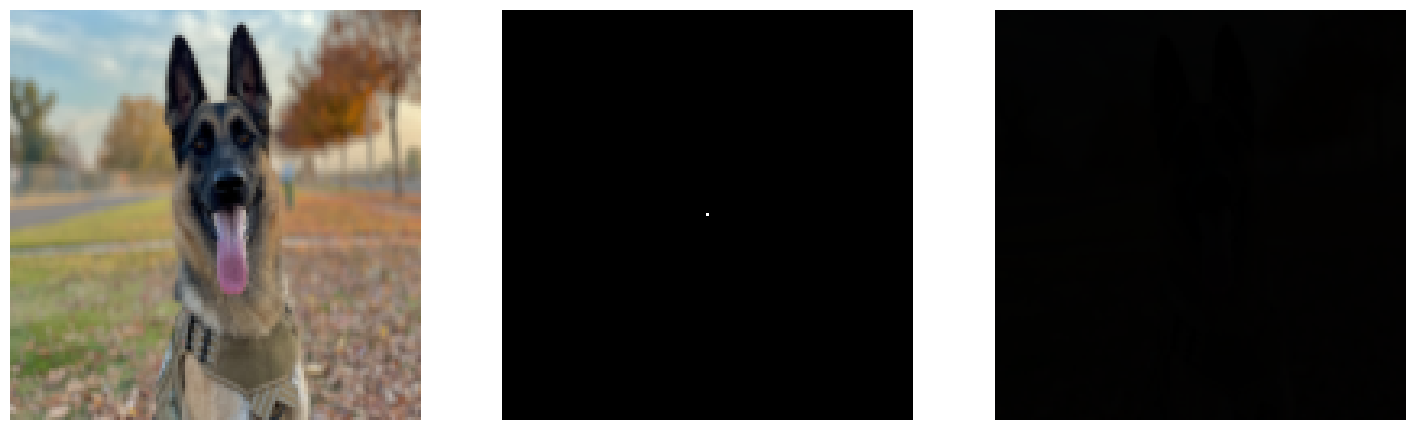

In [5]:
# Create pinhole
pinhole = torch.zeros((p, p))
center = (p-1)//2
pinhole[center, center] = aperture_val
D_r = mura.FFT_convolve(img[0], pinhole).type(torch.int32)
D_g = mura.FFT_convolve(img[1], pinhole).type(torch.int32)
D_b = mura.FFT_convolve(img[2], pinhole).type(torch.int32)

D_pinhole = torch.cat((D_r, D_g, D_b), dim=0).view(3, p,p)

# For grayscale only
# D_pinhole = mura.FFT_convolve(img, pinhole)
# sns.heatmap(img, cmap='gray', ax=axs[0],vmin=0, vmax= 255)
# sns.heatmap(pinhole, cmap='gray', ax=axs[1])
# sns.heatmap(D_pinhole, cmap='gray', ax=axs[2], vmin=0, vmax= 255)

fig, axs = plt.subplots(1,3, figsize=(18,8))
axs = axs.ravel()

axs[0].imshow(img.permute(1,2,0))
axs[1].imshow(pinhole, cmap='gray')
axs[2].imshow(D_pinhole.permute(1,2,0))

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

# fig.savefig(os.path.join(path, 'figs/koda_pinhole.svg'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 126.5, 126.5, -0.5)

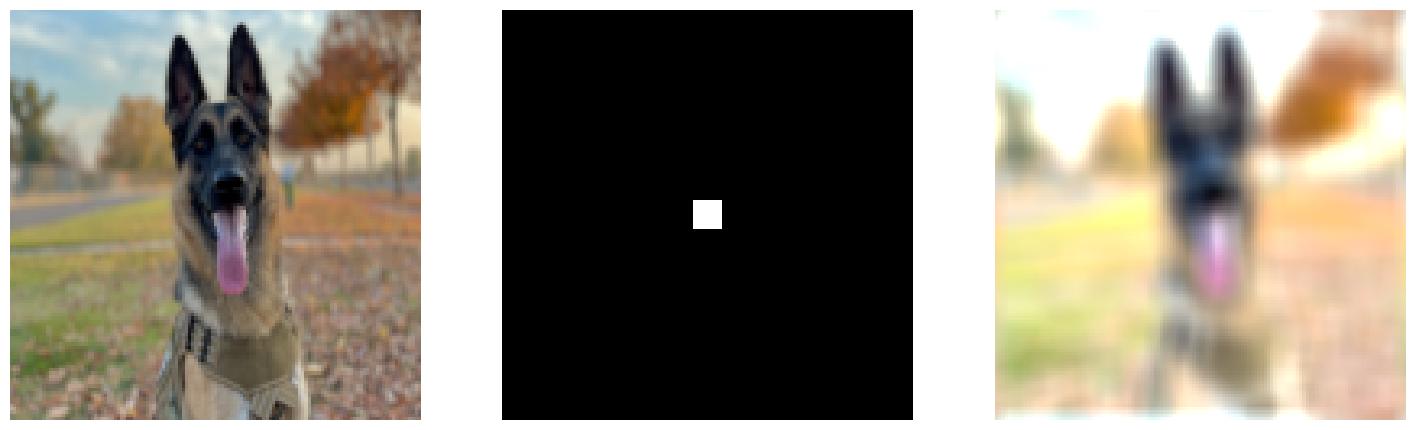

In [6]:
# pinhole with larger diameter
pinhole = torch.zeros((p, p))
center = (p-1)//2
pinhole[center-4:center+5, center-4:center+5] = aperture_val #larger diameter
D_r = mura.FFT_convolve(img[0], pinhole).type(torch.int32)
D_g = mura.FFT_convolve(img[1], pinhole).type(torch.int32)
D_b = mura.FFT_convolve(img[2], pinhole).type(torch.int32)

D_pinhole = torch.cat((D_r, D_g, D_b), dim=0).view(3, p,p)

# For grayscale only
# D_pinhole = mura.FFT_convolve(img, pinhole)
# sns.heatmap(img, cmap='gray', ax=axs[0],vmin=0, vmax= 255)
# sns.heatmap(pinhole, cmap='gray', ax=axs[1])
# sns.heatmap(D_pinhole, cmap='gray', ax=axs[2], vmin=0, vmax= 255)

fig, axs = plt.subplots(1,3, figsize=(18,6))
axs = axs.ravel()

axs[0].imshow(img.permute(1,2,0))
axs[1].imshow(pinhole, cmap='gray')
axs[2].imshow(D_pinhole.permute(1,2,0))

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 126.5, 126.5, -0.5)

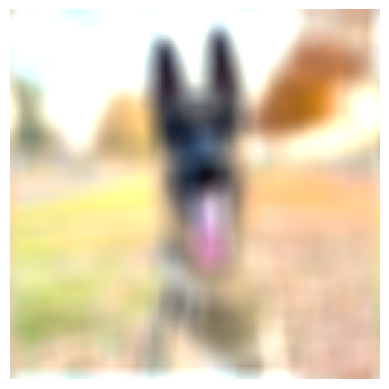

In [7]:
plt.imshow(D_pinhole.permute(1,2,0))
plt.axis('off')
# plt.savefig(os.path.join(path, 'figs/koda_pinhole_2.svg'))

(-0.5, 126.5, 126.5, -0.5)

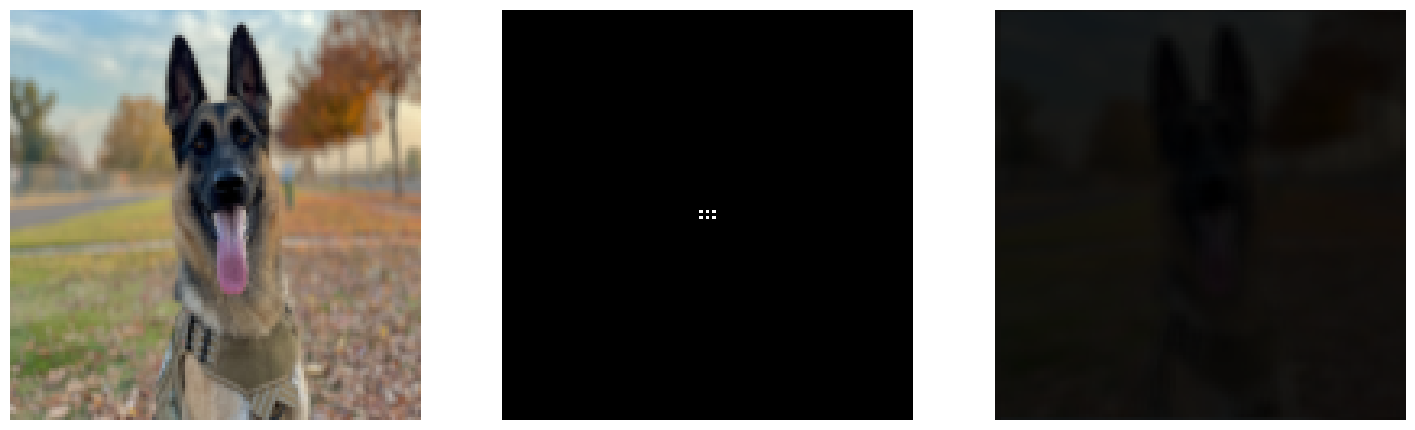

In [8]:
# Multiple pinholes
pinhole = torch.zeros((p, p))
center = (p-1)//2
multiple_pn = [[1,0,1,0,1], [0,0,0,0,0],[1,0,1,0,1]]
pinhole[center-1:center+2, center-2:center+3] += np.multiply(aperture_val, multiple_pn)
D_r = mura.FFT_convolve(img[0], pinhole).type(torch.int32)
D_g = mura.FFT_convolve(img[1], pinhole).type(torch.int32)
D_b = mura.FFT_convolve(img[2], pinhole).type(torch.int32)

D_pinhole = torch.cat((D_r, D_g, D_b), dim=0).view(3, p,p)

# For grayscale only
# D_pinhole = mura.FFT_convolve(img, pinhole)
# sns.heatmap(img, cmap='gray', ax=axs[0],vmin=0, vmax= 255)
# sns.heatmap(pinhole, cmap='gray', ax=axs[1])
# sns.heatmap(D_pinhole, cmap='gray', ax=axs[2], vmin=0, vmax= 255)

fig, axs = plt.subplots(1,3, figsize=(18,6))
axs = axs.ravel()

axs[0].imshow(img.permute(1,2,0))
axs[1].imshow(pinhole, cmap='gray')
axs[2].imshow(D_pinhole.permute(1,2,0))

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

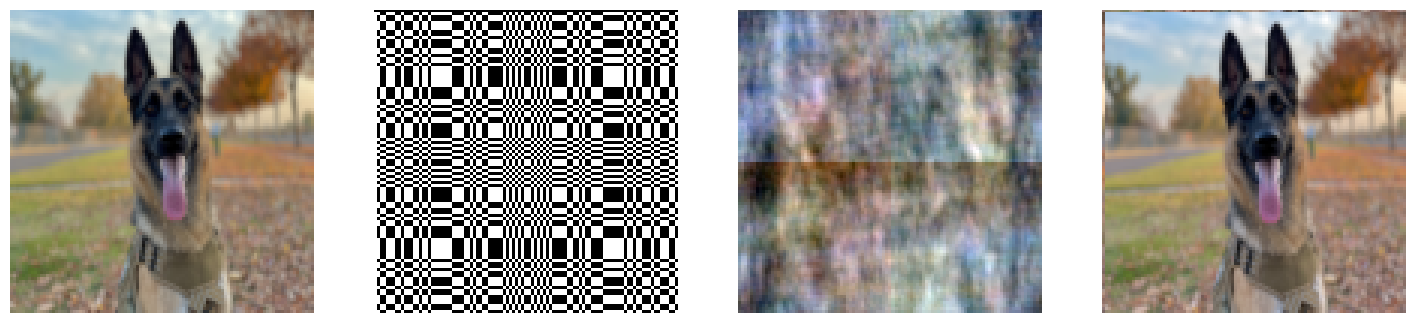

In [51]:
aperture = mura.create_binary_aperture_arr(p)
decoder = mura.create_decoding_arr(aperture)
D_r = mura.normalize(mura.FFT_convolve(img[0], aperture).type(torch.int32), a=0, b=255)
D_g = mura.normalize(mura.FFT_convolve(img[1], aperture).type(torch.int32), a=0, b=255)
D_b = mura.normalize(mura.FFT_convolve(img[2], aperture).type(torch.int32), a=0, b=255)

S_r = mura.normalize(mura.FFT_convolve(D_r, decoder).type(torch.int32), a=0, b=255)
S_g = mura.normalize(mura.FFT_convolve(D_g, decoder).type(torch.int32), a=0, b=255)
S_b = mura.normalize(mura.FFT_convolve(D_b, decoder).type(torch.int32), a=0, b=255)

D_pinhole = torch.cat((D_r, D_g, D_b), dim=0).view(3, p,p)
S_recon = torch.cat((S_r, S_g, S_b), dim=0).view(3, p,p)

# For grayscale only
# D_pinhole = mura.FFT_convolve(img, pinhole)
# sns.heatmap(img, cmap='gray', ax=axs[0],vmin=0, vmax= 255)
# sns.heatmap(pinhole, cmap='gray', ax=axs[1])
# sns.heatmap(D_pinhole, cmap='gray', ax=axs[2], vmin=0, vmax= 255)

fig, axs = plt.subplots(1,4, figsize=(18,6))
axs = axs.ravel()

axs[0].imshow(img.permute(1,2,0))
axs[1].imshow(aperture, cmap='gray')
axs[2].imshow(D_pinhole.permute(1,2,0).type(torch.int16))
axs[3].imshow(S_recon.permute(1,2,0).type(torch.int16))
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')

fig.savefig(os.path.join(path, 'figs/koda_CA.svg'))

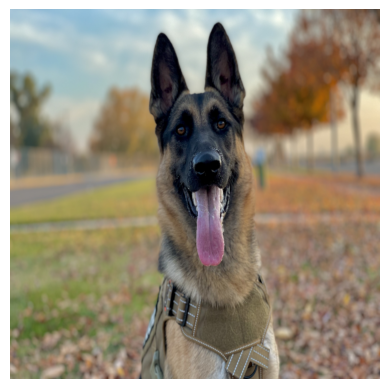

In [43]:
plt.imshow(img.permute(1,2,0))
plt.axis('off')
plt.savefig(os.path.join(path, 'figs/koda_S.svg'))

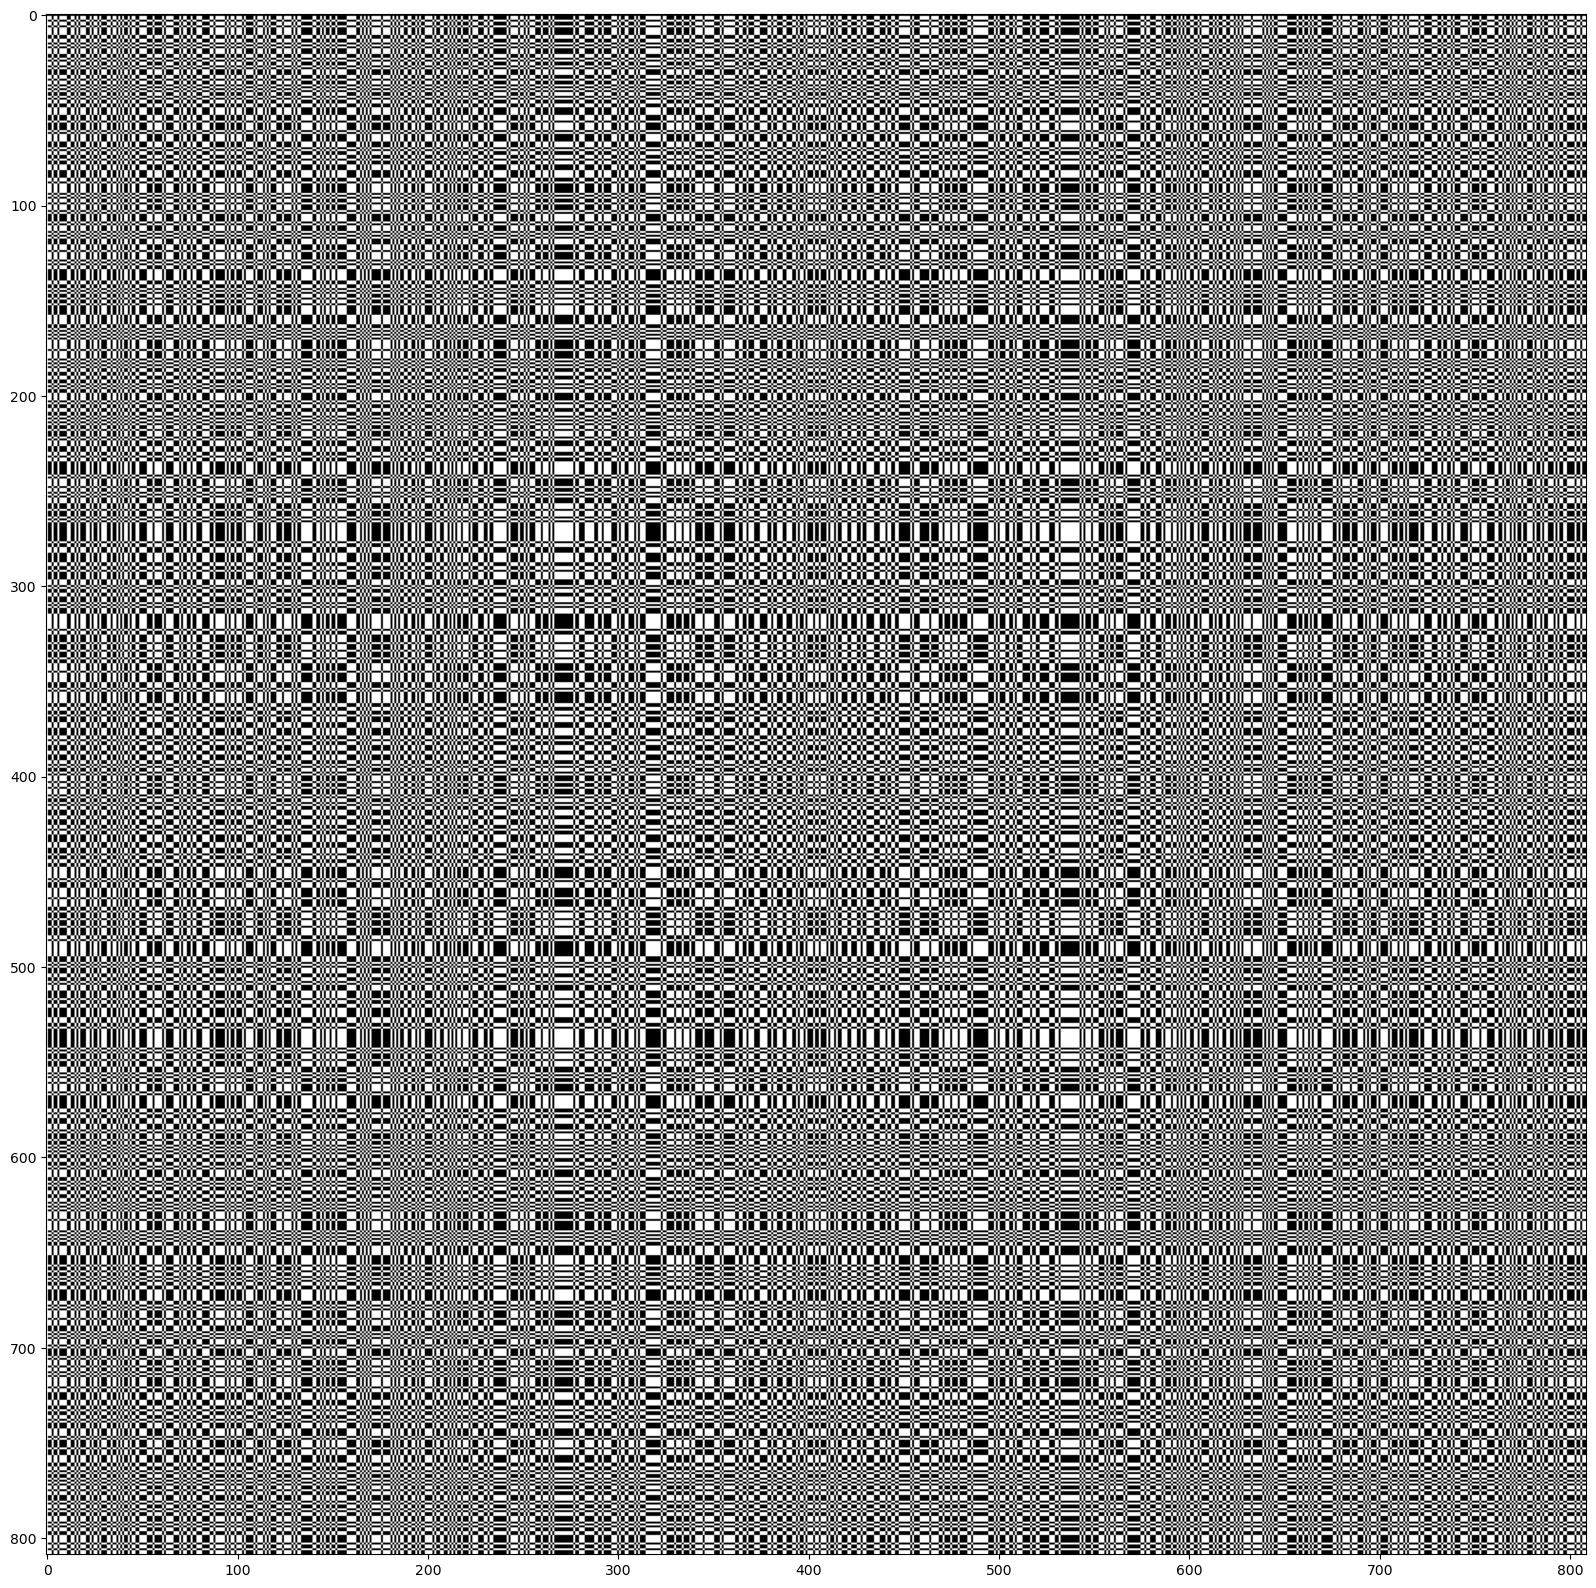

In [47]:
plt.figure(figsize=(20,20))
plt.imshow(aperture, cmap='gray')
plt.savefig(os.path.join(path, 'figs/aperture_large.svg'))